# Deep Neural Network for News Classification: Application

You will use use the functions you'd implemented in the previous assignment to build a deep network, and apply it to politics-society news classification. Hopefully, you will see an improvement in accuracy relative to your previous logistic regression implementation.  

**After this assignment you will be able to:**
- Build and apply a deep neural network to supervised learning. 

Let's get started!

## 1 - Packages

Let's first import all the packages that you will need during this assignment. 
- dnn_app_utils provides the functions implemented in the "Building your Deep Neural Network: Step by Step" assignment to this notebook.

In [31]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection, preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import files

src = list(files.upload().values())[0]
open('dnn_utils_v2.py','wb').write(src)
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

Saving dnn_app_utils_v2.py to dnn_app_utils_v2 (1).py
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2 - Dataset

You will use the same dataset as in "Logistic Regression as a Neural Network". The model you had built had 84% test accuracy on classifying politics-society vs others news. Hopefully, your new model will perform a better!

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('./drive/My Drive/Colab Notebooks/Week 2/Code-Lecture2/news_classification/news_dataset.csv')

In [35]:
df.head()

text          label
0   Nhân tài… đến rồi đi Trong cuộc khảo sát nhan...  Chinhtrixahoi
1  Tử hình Lâm Bích Thủy và Toàn '6 Ngón'  \n Hôm...           Khac
2   Dùng ống chích tống tiền 1 tỉ đồng Tối 19-12,...           Khac
3  Mekong Capital tăng đầu tư vào VN \n Ông Chris...           Khac
4  Tàu hoả húc xe tải gây ách tắc hơn 9 giờ \n Đo...  Chinhtrixahoi

In [36]:
size_politics_society = df[df['label'] == 'Chinhtrixahoi'].shape[0]
size_others = df[df['label'] == 'Khac'].shape[0]
print('Number of politics-society documents: %s' %size_politics_society)
print('Number of other documents: %s' %size_others)

Number of politics-society documents: 200
Number of other documents: 200


In [38]:
# an example of a politics-society news
df['text'][4]

"Tàu hoả húc xe tải gây ách tắc hơn 9 giờ \n Đoàn tàu D2 từ Sài Gòn ra Đà Nẵng đã húc phải một xe tải Kamaz tại Km 1264 trên đường sắt thuộc huyện Vạn Ninh, tỉnh Khánh Hòa. Xe tải hư hại nặng, đầu máy xe lửa trật đường ray. Tai nạn xảy ra vào 22h30' ngày 1/7 khiến nhiều đoàn tàu bị đình trệ. \n Đến 7h30 ngày 2/7, giao thông trên đường sắt xuyên Việt mới trở lại bình thường. \n Theo ông Nguyễn Đình Tân, Giám đốc Xí nghiệp vận tải đường sắt Phú Khánh, nguyên nhân tai nạn do xe tải chở vật liệu nặng băng qua đường sắt nhưng không vượt qua được và nằm chắn ngang trên đường ray. Tài xế xe tải đã bỏ trốn. \n Tại ga Đà Nẵng, lúc 10h ngày 2/7 nhà ga mới thông báo về sự kiện này khiến hơn 500 hành khách đi trên 7 chuyến tàu E, S đã mua vé từ Đà Nẵng đi ra phía bắc rất bực mình vì phải đợi tàu nhiều giờ, nhất là hàng trăm thí sinh cùng người nhà đi thi đại học tại Vinh và Hà Nội. \n  \n "

In [39]:
# split the dataset into training and test datasets 
train_x, test_x, train_y, test_y = model_selection.train_test_split(df['text'], df['label'])

# label encode the target variable, encode labels to 0 or 1
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)
print('["Chinhtrixahoi" "Khac"] labels corresponds to %s labels' %encoder.transform(["Chinhtrixahoi", "Khac"]))

["Chinhtrixahoi" "Khac"] labels corresponds to [0 1] labels


#### TF-IDF Vectors as features

In [0]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xtest_tfidf =  tfidf_vect.transform(test_x)

In [0]:
# To have matrix/vector dimensions that fit out networks
# you should now transpose the training and testing numpy-array, 
# and expand the shape of the lable arrays in the axis=0 position.train_y = np.expand_dims(train_y, axis=0)
train_y = np.expand_dims(train_y, axis=0)
test_y = np.expand_dims(test_y, axis=0)

# for convenience in this exercise, we also use toarray() to convert sparse to dense matrix 
xtrain_tfidf =  xtrain_tfidf.T.toarray() 
xtest_tfidf =  xtest_tfidf.T.toarray()
### END CODE HERE ###

In [0]:
# Getting transformed training and testing dataset
print('Number of training documents: %s' %str(xtrain_tfidf.shape[0]))
print('Number of testing documents: %s' %str(xtest_tfidf.shape[0]))
print('Number of features of each document: %s' %str(xtrain_tfidf.shape[1]))
print('xtrain_tfidf shape: %s' %str(xtrain_tfidf.shape))
print('train_y shape: %s' %str(train_y.shape))
print('xtest_tfidf shape: %s' %str(xtest_tfidf.shape))
print('test_y shape: %s' %str(test_y.shape))

Number of training documents: 5000
Number of testing documents: 5000
Number of features of each document: 300
xtrain_tfidf shape: (5000, 300)
train_y shape: (1, 300)
xtest_tfidf shape: (5000, 100)
test_y shape: (1, 100)


In [0]:
# New shape 
print('xtrain_tfidf shape: %s' %str(xtrain_tfidf.shape))
print('train_y shape: %s' %str(train_y.shape))
print('xtest_tfidf shape: %s' %str(xtest_tfidf.shape))
print('test_y shape: %s' %str(test_y.shape))

xtrain_tfidf shape: (5000, 300)
train_y shape: (1, 300)
xtest_tfidf shape: (5000, 100)
test_y shape: (1, 100)


## 3 - Architecture of your model

Now that you are familiar with the dataset, it is time to build a deep neural network to distinguish politics-society news from other news.

You will build two different models:
- A 2-layer neural network
- An L-layer deep neural network

You will then compare the performance of these models, and also try out different values for $L$. 

Let's look at the two architectures.

### 3.1 - 2-layer neural network
#### An analogy between images and news classifcation

<img src="images/2layerNN_kiank.png" style="width:650px;height:400px;">
<caption><center> <u>Figure 2</u>: 2-layer neural network. <br> The model can be summarized as: ***INPUT -> LINEAR -> RELU -> LINEAR -> SIGMOID -> OUTPUT***. </center></caption>

<u>Detailed Architecture of figure 2</u>:
- The input is a (64,64,3) image which is flattened to a vector of size $(12288,1)$. 
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ of size $(n^{[1]}, 12288)$.
- You then add a bias term and take its relu to get the following vector: $[a_0^{[1]}, a_1^{[1]},..., a_{n^{[1]}-1}^{[1]}]^T$.
- You then repeat the same process.
- You multiply the resulting vector by $W^{[2]}$ and add your intercept (bias). 
- Finally, you take the sigmoid of the result. If it is greater than 0.5, you classify it to be a cat.

### 3.2 - L-layer deep neural network
#### An analogy between images and news classifcation

It is hard to represent an L-layer deep neural network with the above representation. However, here is a simplified network representation:

<img src="images/LlayerNN_kiank.png" style="width:650px;height:400px;">
<caption><center> <u>Figure 3</u>: L-layer neural network. <br> The model can be summarized as: ***[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID***</center></caption>

<u>Detailed Architecture of figure 3</u>:
- The input is a (64,64,3) image which is flattened to a vector of size (12288,1).
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ and then you add the intercept $b^{[1]}$. The result is called the linear unit.
- Next, you take the relu of the linear unit. This process could be repeated several times for each $(W^{[l]}, b^{[l]})$ depending on the model architecture.
- Finally, you take the sigmoid of the final linear unit. If it is greater than 0.5, you classify it to be a cat.

### 3.3 - General methodology

As usual you will follow the Deep Learning methodology to build the model:
    1. Initialize parameters / Define hyperparameters
    2. Loop for num_iterations:
        a. Forward propagation
        b. Compute cost function
        c. Backward propagation
        d. Update parameters (using parameters, and grads from backprop) 
    4. Use trained parameters to predict labels

Let's now implement those two models!

## 4 - Two-layer neural network

**Question**:  Use the helper functions you have implemented in the previous assignment to build a 2-layer neural network with the following structure: *LINEAR -> RELU -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters 
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_cost(AL, Y):
    ...
    return cost
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [0]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    ### END CODE HERE ###
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [0]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
        ### END CODE HERE ###
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [0]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    cost = (-1/m)*(np.sum(np.multiply(Y,np.log(AL))+np.multiply(1-Y,np.log(1-AL)),axis=1,keepdims=True))
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [0]:
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    Z = np.dot(W,A)+b
    ### END CODE HERE ###
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [0]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)
    dW = (1/m)*np.dot(dZ,A_prev.T)
    db = (1/m)*np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    ### END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [0]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        ### END CODE HERE ###
    
    return dA_prev, dW, db

In [0]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads['dW'+str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads['db'+str(l+1)]
    ### END CODE HERE ###
    return parameters

In [0]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 5000
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [0]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.1, num_iterations = 2000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X,W1,b1,activation='relu')
        A2, cache2 = linear_activation_forward(A1,W2,b2,activation='sigmoid')
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2,Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2,activation='sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1,activation='relu') 
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters,grads,learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Run the cell below to train your parameters. See if your model runs. The cost should be decreasing.

Cost after iteration 0: 0.6931475379427394
Cost after iteration 100: 0.6931321574776348
Cost after iteration 200: 0.6931064067560664
Cost after iteration 300: 0.6930518851628301
Cost after iteration 400: 0.692926173072435
Cost after iteration 500: 0.6926336626751214
Cost after iteration 600: 0.6919475739568354
Cost after iteration 700: 0.6903564593439382
Cost after iteration 800: 0.6866952341352914
Cost after iteration 900: 0.6784391061234374
Cost after iteration 1000: 0.6605496356627871
Cost after iteration 1100: 0.6248107303348884
Cost after iteration 1200: 0.5627344398361673
Cost after iteration 1300: 0.47473821377770264
Cost after iteration 1400: 0.376838128025999
Cost after iteration 1500: 0.2886038054845183
Cost after iteration 1600: 0.21892012797597465
Cost after iteration 1700: 0.16721289458308203
Cost after iteration 1800: 0.12966636079343224
Cost after iteration 1900: 0.10240758573940034
Cost after iteration 2000: 0.08243792619729824
Cost after iteration 2100: 0.0676054938239

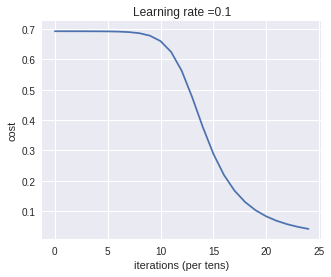

In [0]:
parameters = two_layer_model(xtrain_tfidf, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

Good thing you built a vectorized implementation! Otherwise it might have taken 10 times longer to train this.

Now, you can use the trained parameters to classify news from the dataset. To see your predictions on the training and test sets, run the cell below.

In [0]:
predictions_train = predict(xtrain_tfidf, train_y, parameters)

NameError: ignored

In [0]:
predictions_test = predict(xtest_tfidf, test_y, parameters)

**Note**: Running the model on fewer iterations may gives better accuracy on the test set. This is called "early stopping" and we will talk about it in the next course. Early stopping is a way to prevent overfitting. 

Congratulations! It seems that your 2-layer neural network has better performance than the logistic regression implementation. Let's see if you can do even better with an $L$-layer model.

## 5 - L-layer Neural Network

**Question**: Use the helper functions you have implemented previously to build an $L$-layer neural network with the following structure: *[LINEAR -> RELU]$\times$(L-1) -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters_deep(layers_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [0]:
### CONSTANTS ###
layers_dims = [5000, 20, 7, 5, 1] #  4-layer model

In [0]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network
    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        ### END CODE HERE ###
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
        
    return parameters

In [0]:
# GRADED FUNCTION: L_model_forward

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        ### START CODE HERE ### (≈ 2 lines of code)
        A, cache = linear_activation_forward(A_prev,parameters['W'+str(l)],parameters['b'+str(l)],activation='relu')
        caches.append(cache)
        ### END CODE HERE ###
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (≈ 2 lines of code)
    AL, cache = linear_activation_forward(A,parameters['W'+str(L)],parameters['b'+str(L)],activation='sigmoid')
    caches.append(cache)
    ### END CODE HERE ###
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [0]:
# GRADED FUNCTION: L_model_backward

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    ### START CODE HERE ### (1 line of code)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    ### END CODE HERE ###
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    ### START CODE HERE ### (approx. 2 lines)
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,current_cache,activation='sigmoid')
    ### END CODE HERE ###
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        ### START CODE HERE ### (approx. 5 lines)
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)],current_cache,activation='relu')
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        ### END CODE HERE ###

    return grads

In [0]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    cost = (-1/m)*(np.sum(np.multiply(Y,np.log(AL))+np.multiply(1-Y,np.log(1-AL)),axis=1,keepdims=True))
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [0]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads['dW'+str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads['db'+str(l+1)]
    ### END CODE HERE ###
    return parameters

In [0]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.1, num_iterations = 200, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X,parameters)
        ### END CODE HERE ###
        print (parameters)
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL,Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL,Y,caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters,grads,learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

You will now train the model as a 4-layer neural network. 

Run the cell below to train your model. The cost should decrease on every iteration.

In [0]:
parameters = L_layer_model(xtrain_tfidf, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [0]:
xtrain_tfidf.shape

In [0]:
pred_train = predict(xtrain_tfidf, train_y, parameters)

In [0]:
pred_test = predict(xtest_tfidf, test_y, parameters)

It seems that your 4-layer neural network has slightly better performance (88%) than 2-layer neural network (87%) on the same test set. The 4-layer network also needs much less iterations to converge.

This is good performance for this task. Nice job! 

Though in the next course on "Improving deep neural networks" you will learn how to obtain even higher accuracy by systematically searching for better hyperparameters (learning_rate, layers_dims, num_iterations, and others you'll also learn in the next course). 

##  6) Results Analysis

First, let's take a look at some news the L-layer model labeled incorrectly. This will show a few mislabeled news. 

In [0]:
a = pred_test + test_y
mislabeled_indices = np.asarray(np.where(a == 1))

In [0]:
import re
num_news = len(mislabeled_indices[0])
for i in range(num_news):
    index = mislabeled_indices[1][i]
    true = test_y[0][index]
    pred = pred_test[0][index]
    print('This is "%s" news, you predicted it is "%s" news: \n' %(encoder.inverse_transform(true), encoder.inverse_transform(int(pred))))
    print(re.sub(r'\s{2,}', "", list(test_x[index:index+1])[0]))
    print('------------------------------------------------------------')

## 7) Test with your own news (optional/ungraded exercise) ##

Congratulations on finishing this assignment. You can use your own news and see the output of your model.

["Chinhtrixahoi" "Khac"] labels corresponds to [0 1] labels

In [0]:
my_text = u"""Làm mẹ khi quá trẻ dễ bị loãng xương
Những cô gái mới lớn mang thai sẽ gia tăng nguy cơ xương bị yếu đi. Trong một nghiên cứu mới tại Mỹ, 1/3 số bà mẹ ở tuổi thiếu niên có chỉ số điển hình của bệnh loãng xương, hoặc có dấu hiệu báo trước căn bệnh này.
"Cần phải đảm bảo rằng những bà mẹ thiếu niên tiêu thụ đủ lượng canxi trong thời gian mang thai - 1.300 milligram mỗi ngày, để đáp ứng nhu cầu canxi của cả mẹ lẫn bào thai", Kimberly O. O'Brien tại Trường sức khoẻ cộng đồng Johns Hopkins Bloomberg ở Baltimore, phát biểu.
Canxi đặc biệt cần thiết trong thời kỳ mang thai do bào thai khi lớn lên cần nhiều chất dinh dưỡng để hình thành xương, trong lúc bản thân các thiếu nữ cũng cần nhiều canxi cho chính mình. Thực tế, 40% lượng xương của con gái được hình thành trong độ tuổi dậy thì.
Mặc dù có hơn nửa triệu thiếu nữ sinh con tại Mỹ mỗi năm, chưa có nhiều thông tin về việc mang thai ảnh hưởng thế nào tới xương của người mẹ. O'Brien và cộng sự đã nghiên cứu 23 cô gái mang thai trong độ tuổi 13,5 đến 18,3. Cũng giống như người lớn, lượng tiêu thụ canxi trong thời kỳ mang thai của các cô gái trẻ cao hơn là sau khi sinh.
Khoảng 1/3 các bà mẹ trẻ có dấu hiệu xương mỏng đi đáng kể sau khi sinh. Trong số 15 em được đo xương trong 3-4 tháng sau khi sinh, 2 em có đủ dấu hiệu của bệnh loãng xương. 3 em khác có dấu hiệu của tiền loãng xương.
Tuy vậy, không phải cứ mang thai ở độ tuổi thiếu niên là có xương bị yếu đi. Kết quả nghiên cứu chỉ ra rằng tiêu thụ nhiều lượng canxi hơn trong thời kỳ mang thai sẽ giúp chống lại tình trạng yếu xương.
"""

my_x_tfidf =  tfidf_vect.transform([my_text]).T.toarray()
print(my_x_tfidf.shape)

In [0]:
my_label_y = [1] # the true class of your news
my_predicted_news = predict(my_x_tfidf, my_label_y, parameters)
print ('your L-layer model predicts "%s" ' %encoder.inverse_transform(int(np.squeeze(my_predicted_news))))

**References**:

- for auto-reloading external module: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

## Word Embeddings

In [40]:
!pip install pyvi

In [0]:
from pyvi import ViTokenizer
from gensim.models.word2vec import Word2Vec
from keras.preprocessing import sequence

A word embedding is a form of representing words and documents using a dense vector representation. The position of a word within the vector space is learned from text and is based on the words that surround the word when it is used. Word embeddings can be trained using the input corpus itself or can be generated using pre-trained word embeddings such as Glove, FastText, and Word2Vec. Any one of them can be downloaded and used as transfer learning.

Loading a pretrained word embeddings - based on Vietnam wikipedia.

The word embeddings are trained with gensim - a library for training Word2Vec.

In [42]:
src = list(files.upload().values())[0]
open('vi.bin','wb').write(src)
word_vectors = Word2Vec.load('vi.bin').wv

Saving vi.bin to vi (1).bin


We will see that this also adapt to Vietnamese language since tokenization applied to phrases rather single words.

Show some similar words based on cosine similarity

In [43]:
word_vectors.most_similar('tin_tức')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('thông_tin', 0.6357954144477844),
 ('phóng_viên', 0.6156644821166992),
 ('báo_cáo', 0.6109340786933899),
 ('bình_luận', 0.6045681238174438),
 ('báo_chí', 0.6012976169586182),
 ('biên_tập_viên', 0.5868688821792603),
 ('thời_sự', 0.5609147548675537),
 ('trực_tuyến', 0.5557072162628174),
 ('phóng_sự', 0.5530217885971069),
 ('diễn_đàn', 0.543127179145813)]

In [44]:
word_vectors.most_similar('chính_trị')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('dân_sự', 0.6620455980300903),
 ('quân_sự', 0.6434805989265442),
 ('cấp_tiến', 0.6368024945259094),
 ('tư_tưởng', 0.6343690156936646),
 ('ngoại_giao', 0.627657949924469),
 ('bảo_thủ', 0.6165794134140015),
 ('xã_hội', 0.6104323863983154),
 ('lãnh_đạo', 0.5940430164337158),
 ('đối_ngoại', 0.5933846831321716),
 ('đảng_phái', 0.5786868333816528)]

In [45]:
word_vectors.most_similar('đẹp')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('đặc_sắc', 0.7005241513252258),
 ('phong_cảnh', 0.6793249845504761),
 ('xinh_đẹp', 0.6543668508529663),
 ('đẹp_mắt', 0.609501838684082),
 ('hình_tượng', 0.6040233969688416),
 ('đức_hạnh', 0.5956319570541382),
 ('kỳ_lạ', 0.5923508405685425),
 ('khuôn_mặt', 0.5901848673820496),
 ('sang_trọng', 0.5898487567901611),
 ('linh_thiêng', 0.5832979083061218)]

Get the vector of a word

In [46]:
emb_dim = len(word_vectors['chính_trị'])
print('Length of a word vector: %s' %emb_dim)

Length of a word vector: 100


Get index of a word

In this excercise, we use Pyvi, a popular tokenizer for Vietnamese.

In [48]:
ViTokenizer.tokenize(df['text'][4].lower()) # lowercase all documents to work better with the pretrained model

"tàu_hoả húc xe_tải gây ách_tắc hơn 9 giờ đoàn tàu d2 từ sài_gòn ra đà_nẵng đã húc phải một xe_tải kamaz tại km 1264 trên đường_sắt thuộc huyện vạn_ninh , tỉnh khánh_hòa . xe_tải hư_hại nặng , đầu_máy xe lửa trật đường_ray . tai_nạn xảy ra vào 22h30 ' ngày 1/7 khiến nhiều đoàn tàu bị đình_trệ . đến 7h30 ngày 2/7 , giao_thông trên đường_sắt xuyên việt mới trở_lại bình_thường . theo ông nguyễn_đình tân , giám_đốc xí_nghiệp vận_tải đường_sắt phú_khánh , nguyên_nhân tai_nạn do xe_tải chở vật_liệu nặng băng qua đường_sắt nhưng không vượt qua được và nằm chắn ngang trên đường_ray . tài_xế xe_tải đã bỏ trốn . tại ga đà_nẵng , lúc 10h ngày 2/7 nhà_ga mới thông_báo về sự_kiện này khiến hơn 500 hành_khách đi trên 7 chuyến tàu e , s đã mua vé từ đà_nẵng đi ra phía bắc rất bực_mình vì phải đợi tàu nhiều giờ , nhất là hàng trăm thí_sinh cùng người_nhà đi thi đại_học tại vinh và hà_nội ."

## Homework

- Replace the above tf-idf features with word2vec features - Each news now must has the same length by padding. Train with the above L-layer network and evaluate.
- Train and use your own word vectors and compare the classification performance with the pre-trained model.

**Advanced:** 

- Self-study Keras, a popular library for Deep Learning, to reimplement the above L-layer networks with embedding layer.
- Keep training the embedding layer for classification task.

Ref: https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html

In [49]:
# preparing the text data
# split the dataset into training and test datasets 
train_x, test_x, train_y, test_y = model_selection.train_test_split(df['text'], df['label'])

# label encode the target variable, encode labels to 0 or 1
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)
print('["Chinhtrixahoi" "Khac"] labels corresponds to %s labels' %encoder.transform(["Chinhtrixahoi", "Khac"]))

["Chinhtrixahoi" "Khac"] labels corresponds to [0 1] labels


In [0]:
# preparing the Embedding layer
def pading_data(data, n_max, word_vectors):
  """
    Convert from document to Embedding layer
    
    Arguments:
    data -- data, numpy array of shape (number of examples,)
    n_max -- max number of words in a document
    word_vectors -- vector of Word Embedding layer
    
    Returns:
    result -- Embedding Layer (n_max * 100 (lenght of a Embedding vector)).
  """

  index2word = word_vectors.index2word
  result = []
  for d in data:
    temp = []
    d = ViTokenizer.tokenize(d)
    for j in range(n_max):
      if (j < len(d)):
        if (d[j] in index2word):
          temp = np.append(temp, word_vectors[d[j]])
        else: 
          temp = np.append(temp, np.zeros(100))
      else:
        temp = np.append(temp, np.zeros(100))
    if (len(result) != 0):   
      result = np.append(result, [temp], axis = 0)
    else:
      result = [temp]
  return result

In [0]:
X_train = pading_data(train_x, 400, word_vectors)
Y_train = train_y
X_test = pading_data(test_x, 400, word_vectors)
Y_test = test_y

In [0]:
# Build a model by Keras
from keras.models import Sequential
from keras.layers import Dense
# Initial 
model = Sequential()
# Input layer
model.add(Dense(20, input_dim=40000, init='uniform', activation='relu'))
# Hidden layer 1
model.add(Dense(7, init='uniform', activation='relu'))
# Hidden layer 2
model.add(Dense(5, init='uniform', activation='relu'))
# Output layer
model.add(Dense(1, init='uniform', activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, input_dim=40000, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, activation="relu", kernel_initializer="uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  import sys


In [0]:
# compile model
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [55]:
# input the dataset into created model
model.fit(X_train, Y_train, nb_epoch=4, batch_size=10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/4
300/300 [==============================] - 1s 3ms/step - loss: 0.6939 - acc: 0.4967
Epoch 2/4
300/300 [==============================] - 1s 2ms/step - loss: 0.6732 - acc: 0.5500
Epoch 3/4
300/300 [==============================] - 1s 2ms/step - loss: 0.4899 - acc: 0.8700
Epoch 4/4
300/300 [==============================] - 1s 2ms/step - loss: 0.0852 - acc: 0.9967


In [56]:
scores = model.evaluate(X_test, Y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

100/100 [==============================] - 0s 875us/step
acc: 51.00%
